In [1]:
from fun_genSingleDrop import *


First, we use genSingleDrop function to generate drop without any rotation or tilting.

In [2]:
sigma=73
volume=25
rneedle=1
r0,z0=genSingleDrop(sigma=sigma,volume0=volume,rneedle=rneedle,output=1)


(-1.8579784449651497,
 1.8579784449651497,
 -4.136338355247252,
 0.19696849310701203)

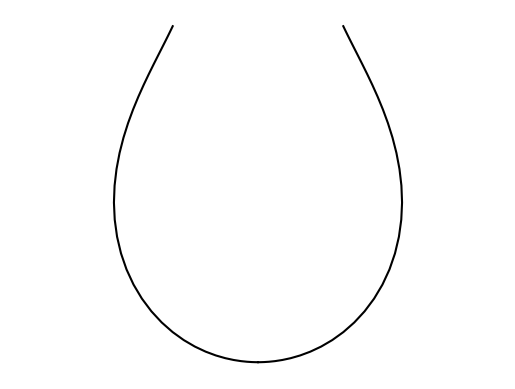

In [3]:
plt.plot(r0,z0,color='black')
plt.plot(-r0,z0,color='black')
plt.axis('equal')
plt.axis('off')

## Camera rotation 
Rotating the camera does not change the equilibrium equation of the droplet, but depending on the axis of rotation, the image taken by the camera may differ from the side view of the droplet.
1. Rotating alone the x-axis, mark the ratation angle is $\alpha$. The point $(r_0,z_0)$ will be rotated by rotation matrix 
$ M(\alpha)=[cos \alpha, -sin \alpha; sin \alpha, cos \alpha] $. 
In the following, we will rotate the droplet 10 degrees counterclockwise with the x-axis as the rotation axis.


In [4]:
alpha_dig=30
alpha=m.radians(alpha_dig)
#print(m.sin(alpha_rad))

rot_matrix=np.asarray(([m.cos(alpha), -m.sin(alpha)], [m.sin(alpha), m.cos(alpha)]))
[r_cx,z_cx]=np.dot(rot_matrix,[r0,z0])
[r_lcx,z_lcx]=np.dot(rot_matrix,[-r0,z0])


(-1.0482527121044636,
 2.960748067003396,
 -3.8292279678283454,
 0.7061537128618516)

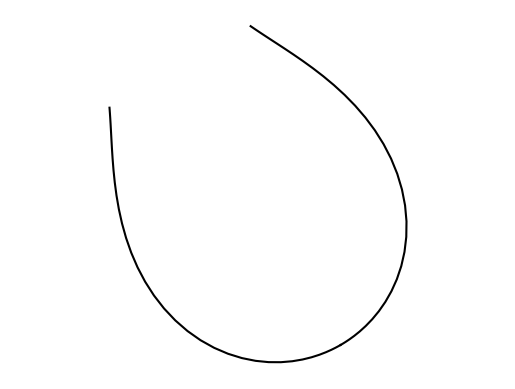

In [5]:
plt.plot(r_cx,z_cx,color='black')
plt.plot(r_lcx,z_lcx,color='black')
plt.axis('equal')
plt.axis('off')

Rotating alone the y-axis and z-axis, mark the ratation angle are $\beta$ and $\gamma$ separately. This causes the length of the droplet in the z and r direction to become longer separately. The final coordinates $(z, r)$ are related to the original coordinates $(z_0, r_0)$ as follows

$z = z_0/cos \beta $ ; 
$r = r_0/cos \gamma$

In [17]:
beta_dig=20 
gamma_dig=0

z=z0/m.cos(m.radians(beta_dig))
r=r0/m.cos(m.radians(gamma_dig))

(-1.8579784449651497,
 1.8579784449651497,
 -4.401799337093699,
 0.2096094922425571)

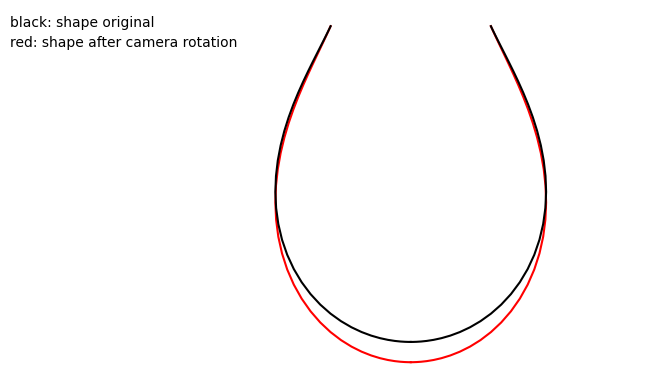

In [18]:
plt.plot(r,z,color='red')
plt.plot(-r,z,color='red')
plt.plot(r0,z0,color='black')
plt.plot(-r0,z0,color='black')
plt.text(x=-5,y=0,s='black: shape original')
plt.text(x=-5,y=-0.25,s='red: shape after camera rotation')

plt.axis('equal')
plt.axis('off')

In [128]:
def plt_image_needle_beta(r_a,z_a,path,l_needle=4,sigma=0,volume0=0,rneedle=1):
    
    path=path+"/s%.2f_v%.2f_rn%.2f_ln%.2f_needle.jpg" %(sigma, volume0, rneedle,l_needle)
    plt.figure(figsize=(10,10))
    plt.plot(r_a,z_a,color='black')
    plt.plot(-r_a,z_a,color='black')
    plt.fill(r_a,z_a,-r_a,z_a,color='black')
    plt.axis('equal')
    plt.axis('off')
    plt.savefig(path)
    return

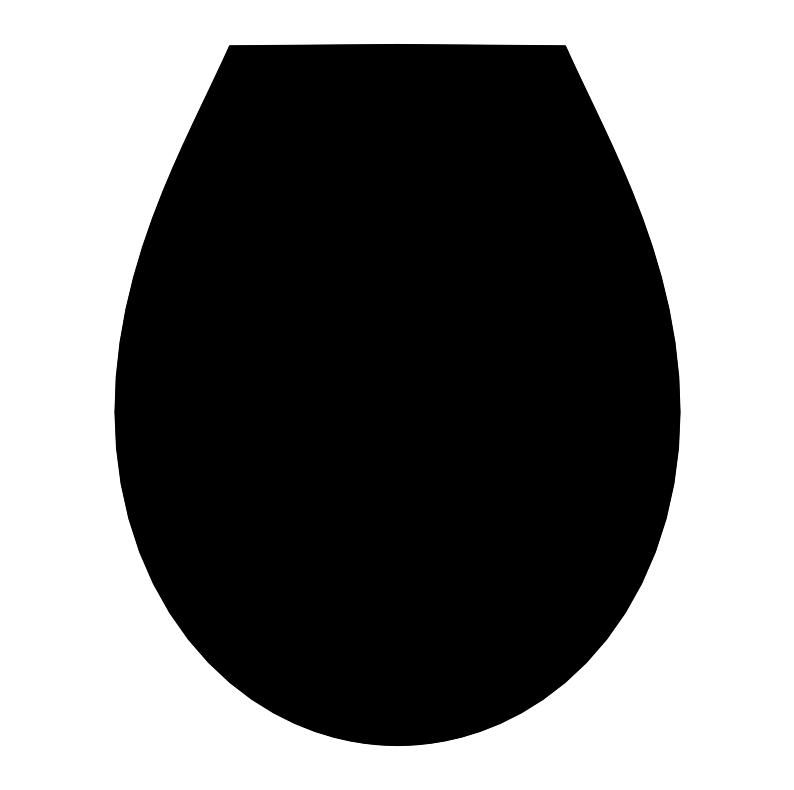

In [129]:
plt_image_needle_beta(r_a=r,z_a=z,sigma=sigma,volume0=volume,rneedle=rneedle,l_needle=2.5,path='.')

# Needle tilting
Then, we will generate the image that needle tilting (or rotation) occurs. The needle can be rotated in x and y direction. (Z-direction's  rotation won't change the drop shape so we don't need to consider it)

## x directions